In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *

%matplotlib notebook

In [2]:
basepath = '/Users/blandt/Desktop/Rundowns/Experiment'

In [3]:
paths = direcslist(basepath, 1)
conditions = [p.split('/')[-2].split('_')[1] for p in paths]

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
imgs_flat = [load_image(p + '/af_corrected_flat.tif') for p in paths]
imgs_3channel = [load_image(p + '/af_corrected_3channel.tif') for p in paths]
imgs_3channel_flat = [load_image(p + '/af_corrected_3channel_flat.tif') for p in paths]

rois = [np.loadtxt(p + '/ROI.txt') for p in paths]

In [4]:
iq = ImageQuant(img=imgs, roi=rois, sigma=3.5, descent_steps=100, rol_ave=5, 
                lr=0.1, iterations=5, fit_outer=True, roi_knots=20)

In [5]:
iq.run()

100%|██████████| 100/100 [00:09<00:00, 10.60it/s]


Time elapsed: 56.68 seconds 


<IPython.core.display.Javascript object>


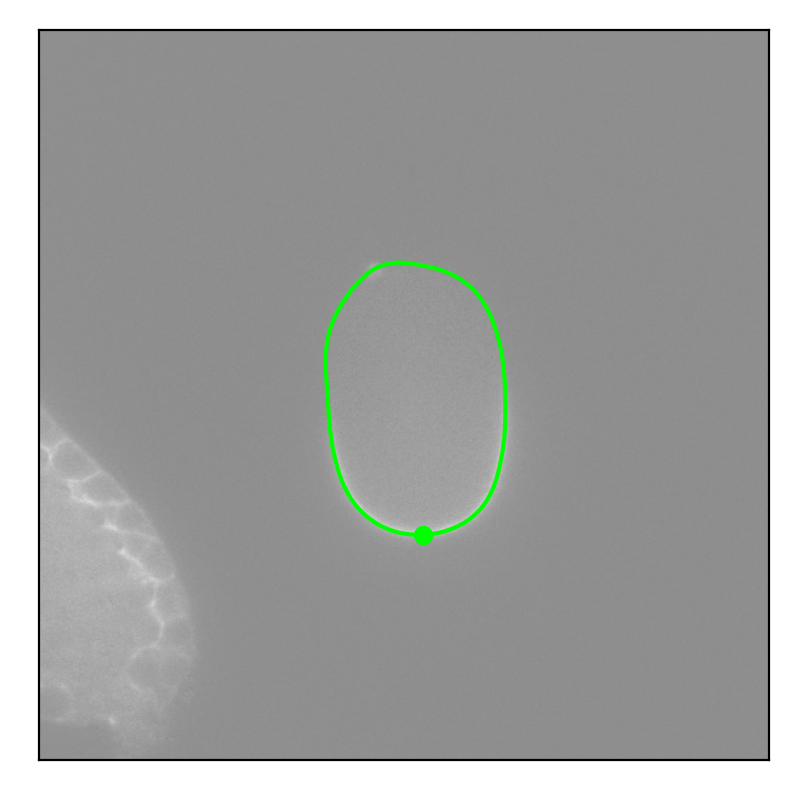

interactive(children=(IntSlider(value=0, description='Frame', max=87), Output()), _dom_classes=('widget-intera…

(<Figure size 400x400 with 1 Axes>, <AxesSubplot:>)

In [6]:
iq.plot_segmentation(jupyter=True)

In [7]:
[np.savetxt(p + '/ROI_fit.txt', r) for p, r in zip(paths, iq.roi)];

In [8]:
# fig, ax = plt.subplots()
# [ax.plot(i) for i, c in zip(iq.offsets, conditions) if c != 'nwg245'];

In [9]:
# [np.savetxt(p + '/ROI_fit.txt', np.loadtxt(p + '/ROI.txt')) for p in direcslist('/Users/blandt/Desktop/Rundowns/N2', 1)];